<a href="https://colab.research.google.com/github/chany-ahn/Directed-Reading-McGill/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pyro-ppl 

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.distributions import constraints

from pyro.nn import AutoRegressiveNN

from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('GPU in use:', torch.cuda.get_device_name(0))
else:
    print('using the CPU')
    device = torch.device("cpu")

using the CPU


In [5]:
# tickers we want to use: Apple, Amazon, Bitcoin, Tesla, and Uber
tickers = ['AAPL','AMZN','BTC-USD','TSLA','UBER']

# Data Exploration

In [33]:
aapl_data = pd.read_csv("/content/drive/MyDrive/ticker_data/AAPL.csv") # apple
amzn_data = pd.read_csv("/content/drive/MyDrive/ticker_data/AMZN.csv") # amazon
btc_data = pd.read_csv("/content/drive/MyDrive/ticker_data/BTC-USD.csv") # bitcoin
tsla_data = pd.read_csv("/content/drive/MyDrive/ticker_data/TSLA.csv") # tesla
uber_data = pd.read_csv("/content/drive/MyDrive/ticker_data/UBER.csv")

data = [aapl_data, amzn_data, btc_data, tsla_data, uber_data]
data

[      Unnamed: 0  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0.1.1        Date  \
 0              0             0             0               0  2017-03-17   
 1              1             1             1               1  2017-03-20   
 2              2             2             2               2  2017-03-21   
 3              3             3             3               3  2017-03-22   
 4              4             4             4               4  2017-03-23   
 ...          ...           ...           ...             ...         ...   
 1254        1254          1254          1254            1254  2022-03-10   
 1255        1255          1255          1255            1255  2022-03-11   
 1256        1256          1256          1256            1256  2022-03-14   
 1257        1257          1257          1257            1257  2022-03-15   
 1258        1258          1258          1258            1258  2022-03-16   
 
             Open        High         Low       Close     Volume  ...  \
 

In [32]:
cols = list(aapl_data.columns)
cols

['Unnamed: 0',
 'Unnamed: 0.2',
 'Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Dividends',
 'Stock Splits',
 'Change',
 'Gain',
 'Loss',
 'bol_middle_band',
 'bol_upper_band',
 'bol_lower_band',
 'rsi',
 'ema10',
 'momemntum',
 'rate of change',
 'ema14']

In [34]:
new_cols = ['Date','Close','bol_middle_band', 'bol_upper_band','bol_lower_band','rsi','ema10','momemntum','rate of change']
for i in range(len(data)):
  data[i] = data[i][new_cols]
  data[i] = data[i].iloc[19:,:] # this removes the rows based on max amount of NA's in a column (hard coded, will generalize this later)
data

[            Date       Close  bol_middle_band  bol_upper_band  bol_lower_band  \
 19    2017-04-13   33.293442        33.609732       34.332862       32.886602   
 20    2017-04-17   33.477551        33.631448       34.309426       32.953470   
 21    2017-04-18   33.328846        33.628379       34.311288       32.945471   
 22    2017-04-19   33.206104        33.638293       34.289569       32.987017   
 23    2017-04-20   33.621536        33.650331       34.290818       33.009845   
 ...          ...         ...              ...             ...             ...   
 1254  2022-03-10  158.520004       165.281501      174.181123      156.381879   
 1255  2022-03-11  154.729996       164.412001      173.856644      154.967359   
 1256  2022-03-14  150.619995       163.511001      174.500293      152.521708   
 1257  2022-03-15  155.089996       162.821500      174.106520      151.536481   
 1258  2022-03-16  159.589996       162.161501      172.535017      151.787985   
 
             r

## Plotting each technical indicator

### Bollinger Bands

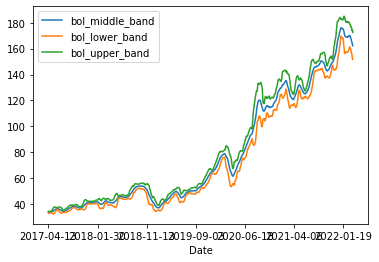

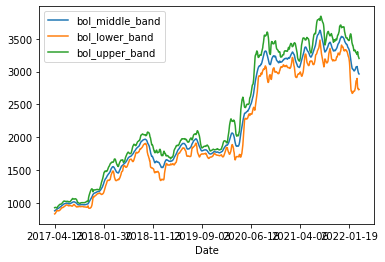

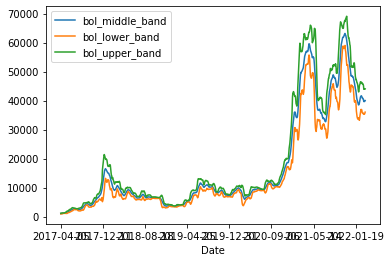

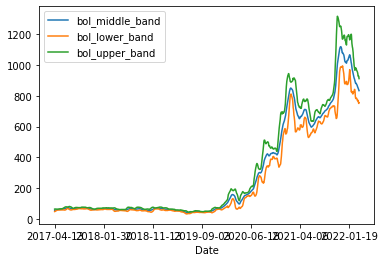

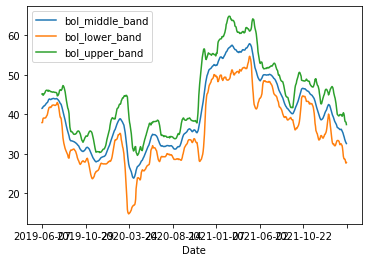

In [41]:
for ticker in data:
  ticker[['Date','bol_middle_band','bol_lower_band', 'bol_upper_band']].plot(kind='line', x='Date')

### RSI

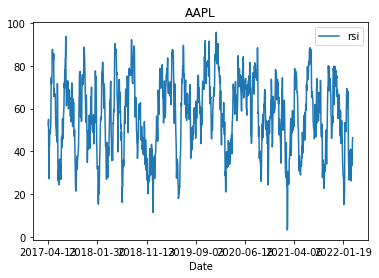

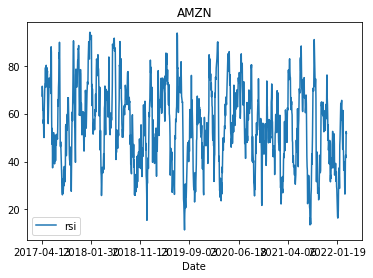

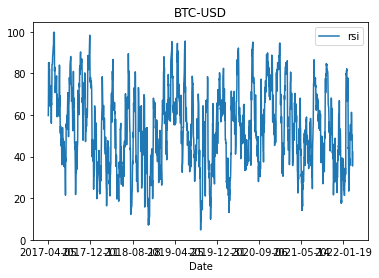

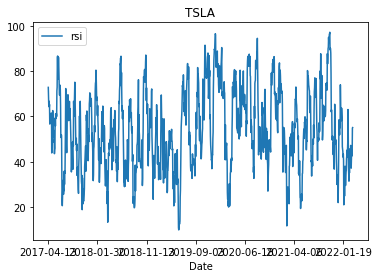

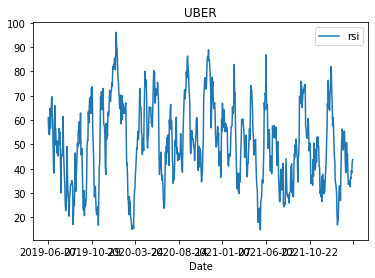

In [43]:
for ticker,t in zip(data,tickers):
  ticker.plot(kind='line',x="Date",y="rsi",title=t)

### Exponential Moving Average

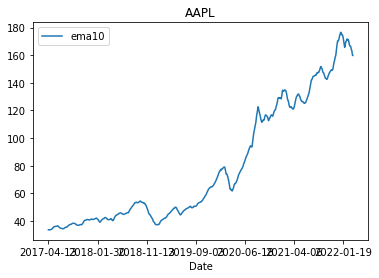

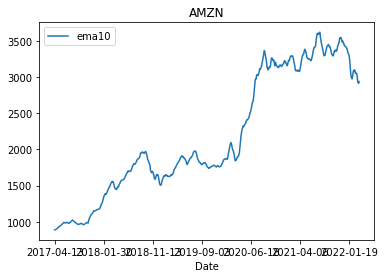

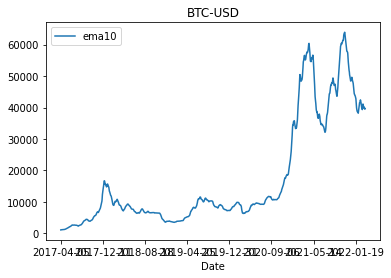

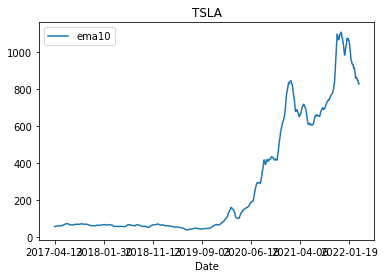

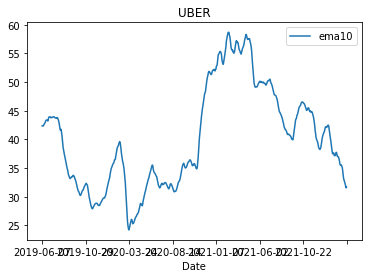

In [45]:
for ticker,t in zip(data,tickers):
  ticker.plot(kind="line",x="Date",y="ema10",title=t)

### Momentum

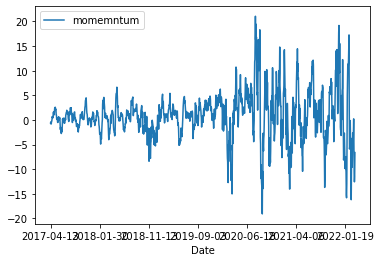

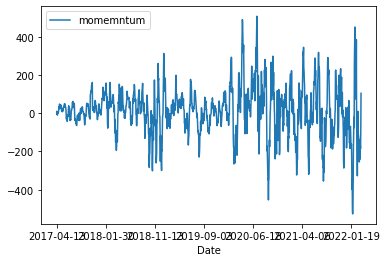

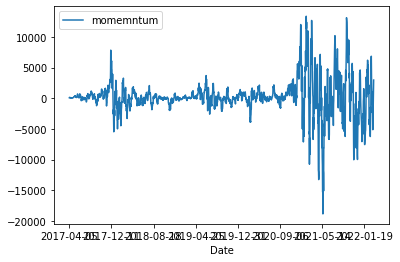

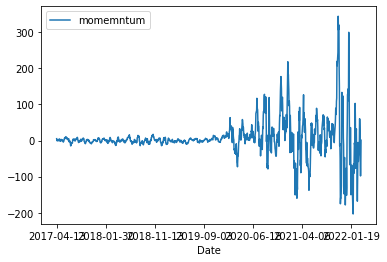

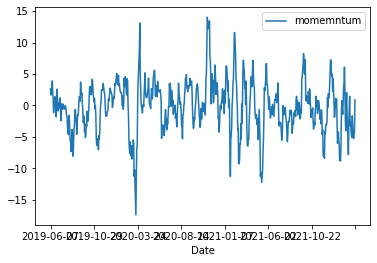

In [46]:
for df,ticker in zip(data, tickers):
  df.plot(kind='line',x='Date',y='momemntum')

### Rate of Change

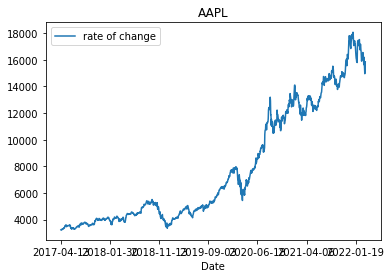

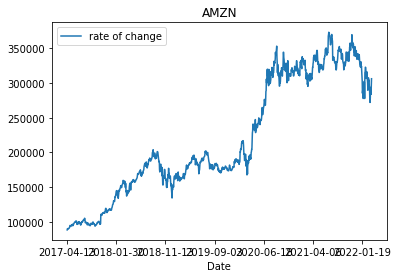

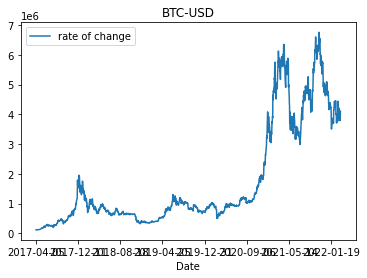

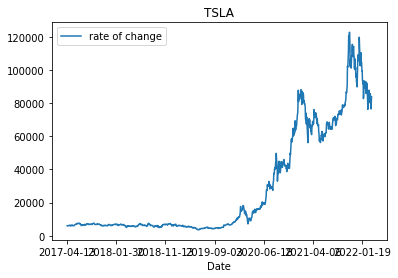

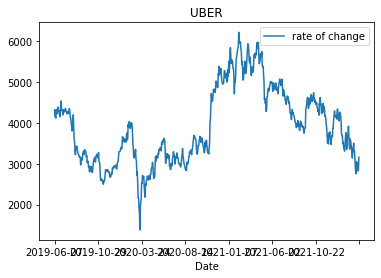

In [48]:
for df,ticker in zip(data,tickers):
  df.plot(kind='line',x='Date',y='rate of change', title=ticker)

# Model

To-do:
- need to figure out how this data is supposed to look...